In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/Users/mayurimamdi/Downloads/mobile_dataset.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
X=df.iloc[:,:-1]
y=df['price_range']

In [6]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [7]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [8]:
df.shape

(2000, 21)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [10]:
orde_rank_features = SelectKBest(score_func=chi2, k=10 )

In [14]:
order_feature=orde_rank_features.fit(X,y)

In [27]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [32]:
dfscores=pd.DataFrame(order_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns, columns=['Feature'])

In [35]:
dfcolumns

,Feature
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [36]:
dfs=pd.concat([dfscores,dfcolumns], axis=1)

In [40]:
dfs.head()

,Score,Feature
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc


In [44]:
dfs.nlargest(10,'Score')

,Score,Feature
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


### Feature Importance

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [49]:
print(model.feature_importances_)

[0.06062562 0.02050213 0.03298591 0.01868671 0.03340871 0.01727125
 0.03516815 0.03331453 0.03633031 0.03278368 0.03390158 0.04642054
 0.04835226 0.39461639 0.03455185 0.03336073 0.0351345  0.01483171
 0.01770639 0.02004706]


In [55]:
rf=pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

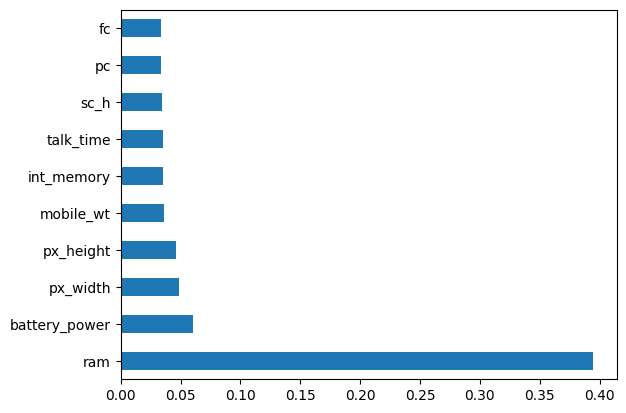

In [57]:
rf.nlargest(10).plot(kind='barh')